# Pregunta 2

#### Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga q > 0 y en el origen también se encuentra una partícula de carga q > 0.

#### (a) Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

Tenemos que la energia potencial de las cargas va como:

$$
U_1=\frac{1}{4\pi\epsilon_0} \frac{q^2}{r}
$$

Mientras que el potencial de un resorte es: 

$$
U_2=(kr^2)/2
$$

Entonces la energía potencial del sistema de cargas oscilando es la suma de $U_1$ y $U_2$.

In [19]:
from pylab import*
%matplotlib inline

In [20]:
#Considerando que (4*pi*epsilon)=1=k, tenemos que:

def energia_potencial(r):
    u_1 = (1./r)
    u_2 = 0.5*(r**2)
    return u_1+u_2

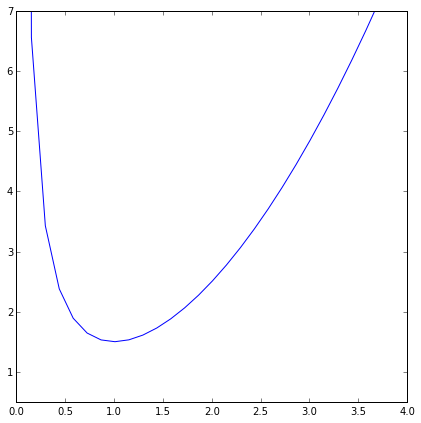

In [21]:
fig=figure(figsize=(7,7))
r = linspace(0.01,7)
plot(r,energia_potencial(r))
ylim([0.5,7])
xlim([0,4])
show()

 La gráfica de la energía potencial total contra la distancia entre las cargas $r$ tiene un mínimo en $r_0 = 1$ pues:

$$
\frac{d}{dr} \Bigl ( \frac{1}{r} + \frac{r^2}{2} \Bigr ) = r - \frac{1}{r^2}
$$

$$
r - \frac{1}{r^2} = 0 \ \ \ \  \Leftrightarrow \ \ \ \ r^3 - 1 = 0 \ \ \ \  \Leftrightarrow \ \ \ \ r = 1
$$

Lo cual implica que van a existir órbitas estables cuando las cargas estén a distancia $r_0$.

Para hacer la simulación que muestre la existencia de dichas órbitas, vamos a escribir las ecuaciones de movimiento:

Dado que no existe fricción, el movimiento de una de las partículas cargadas (suponiendo que la otra está fija en el origen) está dado por:

$$
m\ddot{\vec{r}}+\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{\vert \vec{r}^2 \vert}\hat{r} +k\vec{r} = 0  \ \ \ \ \ \ \dots (1)
$$

Donde $k$ es la constante del oscilador, $\epsilon_0$ es la permitividad eléctrica y  $\vec{r}$ es la distancia entre las cargas.

Separándola en coordenadas obtenemos:

$$
m\ddot{x}-\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^2} \frac{x}{\vert r \vert} + k x = 0 \ \ \ \ \ \ \ \ \ \ \dots (2)
\\
m\ddot{y}-\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^2} \frac{y}{\vert r \vert} + k y = 0 \ \ \ \ \ \ \ \ \ \ \dots (3)
$$


In [106]:
#x[0]=posición_x, x[1]=posición_y, x[2]=velocidad_x, x[3]=velocidad_y
#z[0]=k, z[1]=m, z[2]=q_1, z[3]=q_2, z[4]=fr

#Suponiendo que 4*pi*epsilon=1

def ec_mov(x,t,z):

    mod = (x[0]**2+x[1]**2)**(1.5)
    if z[4] == 0:
        dot_x=x[2]
        ddot_x=((z[3]*z[2]*x[0])/(mod*z[1]))-(z[0]/z[1])*x[0]
    
        dot_y=x[3]
        ddot_y=((z[3]*z[2]*x[1])/(mod*z[1]))-(z[0]/z[1])*x[1]        
        
    else:
        dot_x=x[2]
        fr_x=fric(([x[2],x[3]]))[0]
        ddot_x=fr_x/z[1]+((z[3]*z[2]*x[0])/(mod*z[1]))-(z[0]/z[1])*x[0]
    
        dot_y=x[3]
        fr_y=fric(([x[2],x[3]]))[1]
        ddot_y=fr_y/z[1]+((z[3]*z[2]*x[1])/(mod*z[1]))-(z[0]/z[1])*x[1]
    
    return array([dot_x,dot_y,ddot_x,ddot_y])

Para mostrar las órbitas circulares:

In [23]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Se usa una velocidad muy pequeña pues queremos tener una órbita estable:

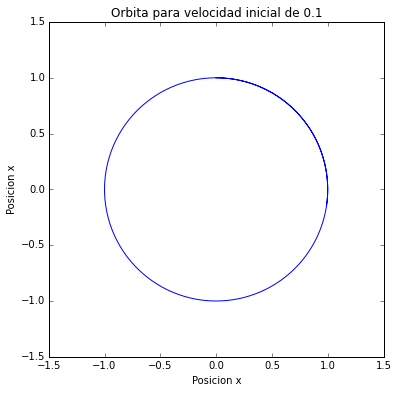

In [114]:
fig=figure(figsize=(6,6))
t,sol=rk4(ec_mov,[0,1,0.01,0],[0,800],[1,1,1,1,0])
title('Orbita para velocidad inicial de 0.1')
xlabel('Posicion x')
ylabel('Posicion x')
plot(sol[:,0],sol[:,1])
show()

Cuando se usan velocidades más grandes obtenemos orbitas que oscilan entre dos radios:

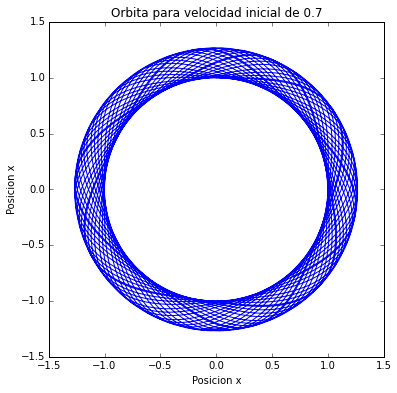

In [115]:
fig=figure(figsize=(6,6))
t,sol=rk4(ec_mov,[0,1,0.7,0],[0,300],[1,1,1,1,0])
plot(sol[:,0],sol[:,1])
title('Orbita para velocidad inicial de 0.7')
xlabel('Posicion x')
ylabel('Posicion x')
show()

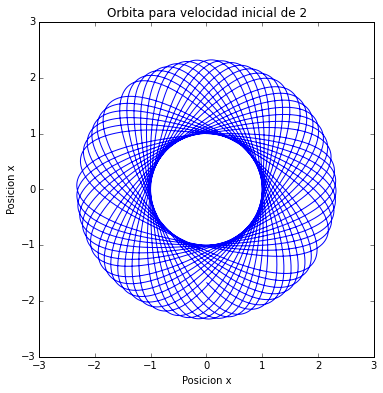

In [116]:
fig=figure(figsize=(6,6))
t,sol=rk4(ec_mov,[0,1,2,0],[0,200],[1,1,1,1,0])
plot(sol[:,0],sol[:,1])
title('Orbita para velocidad inicial de 2')
xlabel('Posicion x')
ylabel('Posicion x')
show()

#### (b) Considerando la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

Utilizando las fórmulas para la fricción del ejercicio anterior se tiene que:

In [103]:
#v[0]=vel_x, v[1]=vel_y
def fric(v,gamma=0.1,mu=0.2):
    norma=(v[0]**2+v[1]**2)**0.5
    if norma < 1:
        fric_x=-gamma*norma*v[0]
        fric_y=-gamma*norma*v[1]
        return array([fric_x,fric_y])
    else:
        fric_x=-mu*(norma**(1.5))*v[0]
        fric_y=-mu*(norma**(1.5))*v[1]
        return array([fric_x,fric_y])

Para velocidades muy pareciéra que el sistema tiene órbitas cerradas, sin embargo, si se compara con la gráfica anterior se puede notar que la línea de ésta órbita con fricción es más gruesa, lo cual implica que hay una diferencia mínima en el radio de la órbita conforme pasa el tiempo:

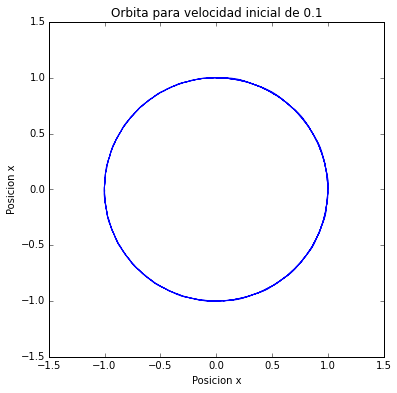

In [117]:
fig=figure(figsize=(6,6))
t,sol=rk4(ec_mov,[0,1,0.1,0],[0,800],[1,1,1,1,1])
plot(sol[:,0],sol[:,1])
title('Orbita para velocidad inicial de 0.1')
xlabel('Posicion x')
ylabel('Posicion x')
show()

Sin embargo, conforme la velocidad aumenta las órbitas empiezan a ser caóticas:

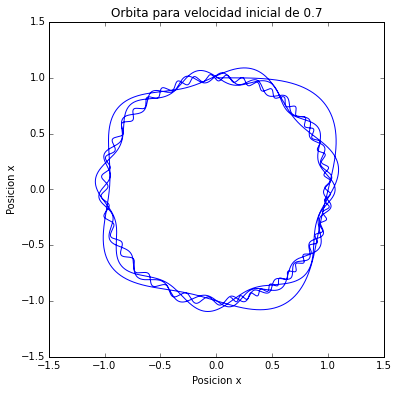

In [118]:
fig=figure(figsize=(6,6))
t,sol=rk4(ec_mov,[0,1,0.7,0],[0,300],[1,1,1,1,1])
plot(sol[:,0],sol[:,1])
title('Orbita para velocidad inicial de 0.7')
xlabel('Posicion x')
ylabel('Posicion x')
show()

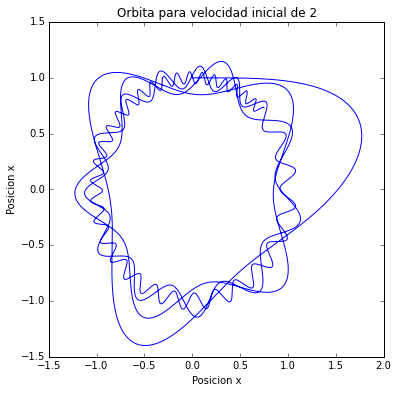

In [119]:
fig=figure(figsize=(6,6))
t,sol=rk4(ec_mov,[0,1,2,0],[0,200],[1,1,1,1,1])
plot(sol[:,0],sol[:,1])
title('Orbita para velocidad inicial de 2')
xlabel('Posicion x')
ylabel('Posicion x')
show()